
1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_estadistica = pd.read_csv('world_data_notnull.csv')
df_estadistica.head(3)

,Unnamed: 0,country,density,abbreviation,agricultural_land(_%),land_area,armed_forces_size,calling_code,capital/major_city,cpi,cpi_change_,currency-code,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,largest_city,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,continent,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
0,0,Afghanistan,60.0,AF,58.1,652.230,323.0,93.0,Kabul,149.90,2.3,AFN,2.1,0.70,1.910135e+10,104.0,9.7,Kabul,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia,32.49,8.672,4.47,47.9,64.5,638.0
1,1,Albania,105.0,AL,43.1,28.748,9.0,355.0,Tirana,119.05,1.4,ALL,28.1,1.36,1.527808e+10,107.0,55.0,Tirana,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe,11.78,4.536,1.62,7.8,78.5,15.0
2,2,Algeria,18.0,DZ,17.4,NaN,317.0,213.0,Algiers,151.36,2.0,DZD,0.8,0.28,1.699882e+11,109.9,51.4,Algiers,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa,24.28,150.006,3.02,20.1,76.7,112.0


In [7]:
df_estadistica.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,195.0,9.700000e+01,5.643580e+01,0.000000e+00,4.850000e+01,9.700000e+01,1.455000e+02,1.940000e+02
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land(_%),188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change_,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
forested_area_,188.0,3.201543e+01,2.379133e+01,0.000000e+00,1.100000e+01,3.200000e+01,4.817500e+01,9.830000e+01
gasoline_price,175.0,1.002457e+00,3.688585e-01,0.000000e+00,7.550000e-01,9.800000e-01,1.240000e+00,2.000000e+00


Mediana

In [11]:
# Seleccionar solo las columnas que tienen datos numéricos
df_numerico = df_estadistica.select_dtypes(include=['number'])

# Imprimir el DataFrame con solo las columnas numéricas
df_numerico

,Unnamed: 0,density,agricultural_land(_%),land_area,armed_forces_size,calling_code,cpi,cpi_change_,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
0,0,60.0,58.1,652.230,323.0,93.0,149.90,2.3,2.1,0.70,1.910135e+10,104.0,9.7,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,32.49,8.672,4.47,47.9,64.50,638.0
1,1,105.0,43.1,28.748,9.0,355.0,119.05,1.4,28.1,1.36,1.527808e+10,107.0,55.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,11.78,4.536,1.62,7.8,78.50,15.0
2,2,18.0,17.4,NaN,317.0,213.0,151.36,2.0,0.8,0.28,1.699882e+11,109.9,51.4,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,24.28,150.006,3.02,20.1,76.70,112.0
3,3,164.0,40.0,468.000,NaN,376.0,NaN,NaN,34.0,1.51,3.154058e+09,106.4,NaN,6.63,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,7.20,469.000,1.27,2.7,79.56,26.0
4,4,26.0,47.5,NaN,117.0,244.0,261.73,17.1,46.3,0.97,9.463542e+10,113.5,9.3,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,40.73,34.693,5.52,51.6,60.80,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,32.0,24.5,912.050,343.0,58.0,NaN,254.9,52.7,0.00,4.823593e+11,97.2,79.3,0.01,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,17.88,164.175,2.27,21.4,72.10,125.0
191,191,314.0,39.3,331.210,522.0,84.0,163.52,2.8,48.1,0.80,2.619212e+11,110.6,28.5,0.73,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,16.75,192.668,2.05,16.5,75.30,43.0
192,192,56.0,44.6,527.968,40.0,967.0,157.58,8.1,1.0,0.92,2.691440e+10,93.6,10.2,NaN,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,30.45,10.609,3.79,42.9,66.10,164.0
193,193,25.0,32.1,752.618,16.0,260.0,212.31,9.2,65.2,1.40,2.306472e+10,98.7,4.1,0.24,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,36.19,5.141,4.63,40.4,63.50,213.0


In [10]:
medianas = df_numerico.median()
medianas

Unnamed: 0                               9.700000e+01
density                                  8.300000e+01
agricultural_land(_%)                    3.960000e+01
land_area                                1.484600e+02
armed_forces_size                        2.850000e+01
calling_code                             2.555000e+02
cpi                                      1.247400e+02
cpi_change_                              2.300000e+00
forested_area_                           3.200000e+01
gasoline_price                           9.800000e-01
gdp                                      3.438723e+10
gross_primary_education_enrollment_      1.025500e+02
gross_tertiary_education_enrollment_     3.120000e+01
minimum_wage                             1.045000e+00
out_of_pocket_health_expenditure         3.070000e+01
physicians_per_thousand                  1.460000e+00
population                               8.826588e+06
population_labor_force_participation_    6.245000e+01
tax_revenue_                

Desviación estándar


Mínimo

Máximo

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [13]:
agrupar = df_estadistica.groupby('country')['density'].agg([max, min])
agrupar

,max,min
country,,
Afghanistan,60.0,60.0
Albania,105.0,105.0
Algeria,18.0,18.0
Andorra,164.0,164.0
Angola,26.0,26.0
...,...,...
Venezuela,32.0,32.0
Vietnam,314.0,314.0
Yemen,56.0,56.0


In [16]:
# Encontrar el país con la mayor densidad de población
pais_mayor_densidad = df_estadistica.loc[df_estadistica['density'].idxmax(), 'country']

# Encontrar el país con la menor población
pais_menor_poblacion = df_estadistica.loc[df_estadistica['density'].idxmin(), 'country']

# Imprimir los resultados
print(f"El país con la mayor densidad de población es: {pais_mayor_densidad}")
print(f"El país con la menor población es: {pais_menor_poblacion}")

El país con la mayor densidad de población es: Palestinian National Authority
El país con la menor población es: Bangladesh


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [22]:
df_estadistica.groupby('country')['birth_rate'].mean()

country
Afghanistan    32.49
Albania        11.78
Algeria        24.28
Andorra         7.20
Angola         40.73
               ...  
Venezuela      17.88
Vietnam        16.75
Yemen          30.45
Zambia         36.19
Zimbabwe       30.68
Name: birth_rate, Length: 195, dtype: float64

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [33]:
# Calculamos los percentiles 25 y 75 de la Columna 'age'
percentile_25_75 = np.percentile(df_estadistica["infant_mortality"], [25, 75])



In [34]:
def clasificar_mortalidad(infant_mortality):
    if infant_mortality <= percentile_25_75[0]:
        return 'baja'
    elif infant_mortality <= percentile_25_75[1]:
        return 'alta'
    else:
        return 'moderada'
    
    # Aplicar la función de clasificación a la columna 'infant_mortality'
df_estadistica['mortalidad_infantil_clasificada'] = df_estadistica['infant_mortality'].apply(clasificar_mortalidad)


In [35]:
df_estadistica[['country', 'infant_mortality', 'mortalidad_infantil_clasificada']]

,country,infant_mortality,mortalidad_infantil_clasificada
0,Afghanistan,47.9,moderada
1,Albania,7.8,alta
2,Algeria,20.1,alta
3,Andorra,2.7,baja
4,Angola,51.6,moderada
...,...,...,...
190,Venezuela,21.4,alta
191,Vietnam,16.5,alta
192,Yemen,42.9,moderada
193,Zambia,40.4,moderada


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [36]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas 
numericas = df_estadistica.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('Unnamed: 0', 'density'),
 ('Unnamed: 0', 'agricultural_land(_%)'),
 ('Unnamed: 0', 'land_area'),
 ('Unnamed: 0', 'armed_forces_size'),
 ('Unnamed: 0', 'calling_code'),
 ('Unnamed: 0', 'cpi'),
 ('Unnamed: 0', 'cpi_change_'),
 ('Unnamed: 0', 'forested_area_'),
 ('Unnamed: 0', 'gasoline_price'),
 ('Unnamed: 0', 'gdp'),
 ('Unnamed: 0', 'gross_primary_education_enrollment_'),
 ('Unnamed: 0', 'gross_tertiary_education_enrollment_'),
 ('Unnamed: 0', 'minimum_wage'),
 ('Unnamed: 0', 'out_of_pocket_health_expenditure'),
 ('Unnamed: 0', 'physicians_per_thousand'),
 ('Unnamed: 0', 'population'),
 ('Unnamed: 0', 'population_labor_force_participation_'),
 ('Unnamed: 0', 'tax_revenue_'),
 ('Unnamed: 0', 'total_tax_rate'),
 ('Unnamed: 0', 'unemployment_rate'),
 ('Unnamed: 0', 'urban_population'),
 ('Unnamed: 0', 'birth_rate'),
 ('Unnamed: 0', 'co2-emissions'),
 ('Unnamed: 0', 'fertility_rate'),
 ('Unnamed: 0', 'infant_mortality'),
 ('Unnamed: 0', 'life_expectancy'),
 ('Unnamed: 0', 'maternal_morta

In [37]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df_estadistica, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('Unnamed: 0', 'density'), ('Unnamed: 0', 'agricultural_land(_%)'), ('Unnamed: 0', 'land_area'), ('Unnamed: 0', 'armed_forces_size'), ('Unnamed: 0', 'calling_code'), ('Unnamed: 0', 'cpi'), ('Unnamed: 0', 'cpi_change_'), ('Unnamed: 0', 'forested_area_'), ('Unnamed: 0', 'gasoline_price'), ('Unnamed: 0', 'gdp'), ('Unnamed: 0', 'gross_primary_education_enrollment_'), ('Unnamed: 0', 'gross_tertiary_education_enrollment_'), ('Unnamed: 0', 'minimum_wage'), ('Unnamed: 0', 'out_of_pocket_health_expenditure'), ('Unnamed: 0', 'physicians_per_thousand'), ('Unnamed: 0', 'population'), ('Unnamed: 0', 'population_labor_force_participation_'), ('Unnamed: 0', 'tax_revenue_'), ('Unnamed: 0', 'total_tax_rate'), ('Unnamed: 0', 'unemployment_rate'), ('Unnamed: 0', 'urban_population'), ('Unnamed: 0', 'birth_rate'), ('Unnamed: 0', 'co2-emissions'), ('Unn

In [39]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df_estadistica.corr(numeric_only = True, method = "spearman")
df_correlaciones

,Unnamed: 0,density,agricultural_land(_%),land_area,armed_forces_size,calling_code,cpi,cpi_change_,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
Unnamed: 0,1.000000,0.091418,0.059480,0.194620,0.114620,0.064886,0.078913,0.146392,-0.031324,-0.005969,0.018263,-0.004809,-0.061025,-0.043509,-0.111997,-0.030939,0.067058,-0.025716,0.030512,-0.207313,-0.056474,0.036487,0.023143,0.067126,0.041120,0.015599,-0.038502,-0.030203
density,0.091418,1.000000,0.200302,-0.220539,0.125936,-0.109384,-0.119915,-0.138960,-0.015206,0.104546,-0.004021,0.033382,-0.012201,0.061765,0.014885,0.026946,0.003951,-0.090923,0.094292,0.023721,-0.152447,-0.008504,-0.167721,0.206563,-0.155948,-0.099030,0.125008,-0.097383
agricultural_land(_%),0.059480,0.200302,1.000000,0.022158,0.173127,-0.036252,0.249278,0.232981,-0.382159,0.031457,0.078430,-0.060903,-0.132087,-0.191189,0.111157,-0.080401,0.276620,-0.150819,-0.072350,0.159252,0.055847,0.233397,0.175959,0.008164,0.167443,0.202133,-0.220115,0.156849
land_area,0.194620,-0.220539,0.022158,1.000000,0.384287,-0.242378,0.136854,0.224723,-0.008680,-0.089567,0.171319,0.022693,-0.071133,-0.097304,0.112200,-0.210800,0.377536,0.033388,-0.209875,0.162818,0.005533,0.329152,0.159701,0.123901,0.164118,0.203096,-0.174111,0.157173
armed_forces_size,0.114620,0.125936,0.173127,0.384287,1.000000,-0.241026,0.094123,0.084370,-0.153847,-0.197941,0.696120,-0.000946,0.255177,0.097284,0.259397,0.120254,0.806528,-0.121036,-0.234878,0.162857,-0.090453,0.816349,-0.118602,0.480679,-0.095454,-0.104961,0.162024,-0.130828
calling_code,0.064886,-0.109384,-0.036252,-0.242378,-0.241026,1.000000,0.105980,-0.016856,-0.085191,-0.143463,-0.356442,-0.068676,-0.227563,-0.151760,-0.054249,-0.074278,-0.343347,0.084262,0.005102,-0.334636,-0.091476,-0.354691,0.166372,-0.269461,0.161371,0.100073,-0.140069,0.041128
cpi,0.078913,-0.119915,0.249278,0.136854,0.094123,0.105980,1.000000,0.804287,-0.091008,-0.325114,0.008686,0.149329,-0.291723,-0.475015,0.185645,-0.293830,0.327053,0.039076,-0.320285,0.092007,0.023119,0.251701,0.391884,-0.140087,0.359507,0.419904,-0.422903,0.413722
cpi_change_,0.146392,-0.138960,0.232981,0.224723,0.084370,-0.016856,0.804287,1.000000,-0.033153,-0.146547,0.020980,0.043075,-0.173455,-0.320803,0.155117,-0.187636,0.261089,-0.048238,-0.237048,0.095983,0.159493,0.212148,0.237546,-0.119780,0.216461,0.283011,-0.314851,0.275808
forested_area_,-0.031324,-0.015206,-0.382159,-0.008680,-0.153847,-0.085191,-0.091008,-0.033153,1.000000,0.176439,-0.130333,0.115076,0.008781,0.063705,-0.185938,-0.060867,-0.189834,0.160070,0.097872,0.103458,-0.075399,-0.186096,-0.084271,0.005897,-0.071767,-0.043982,-0.004174,0.043665
gasoline_price,-0.005969,0.104546,0.031457,-0.089567,-0.197941,-0.143463,-0.325114,-0.146547,0.176439,1.000000,-0.061793,-0.067729,0.142620,0.367641,-0.302229,0.220617,-0.259080,-0.074112,0.429833,0.050748,0.042535,-0.230538,-0.302687,0.028031,-0.291935,-0.339145,0.349914,-0.275711


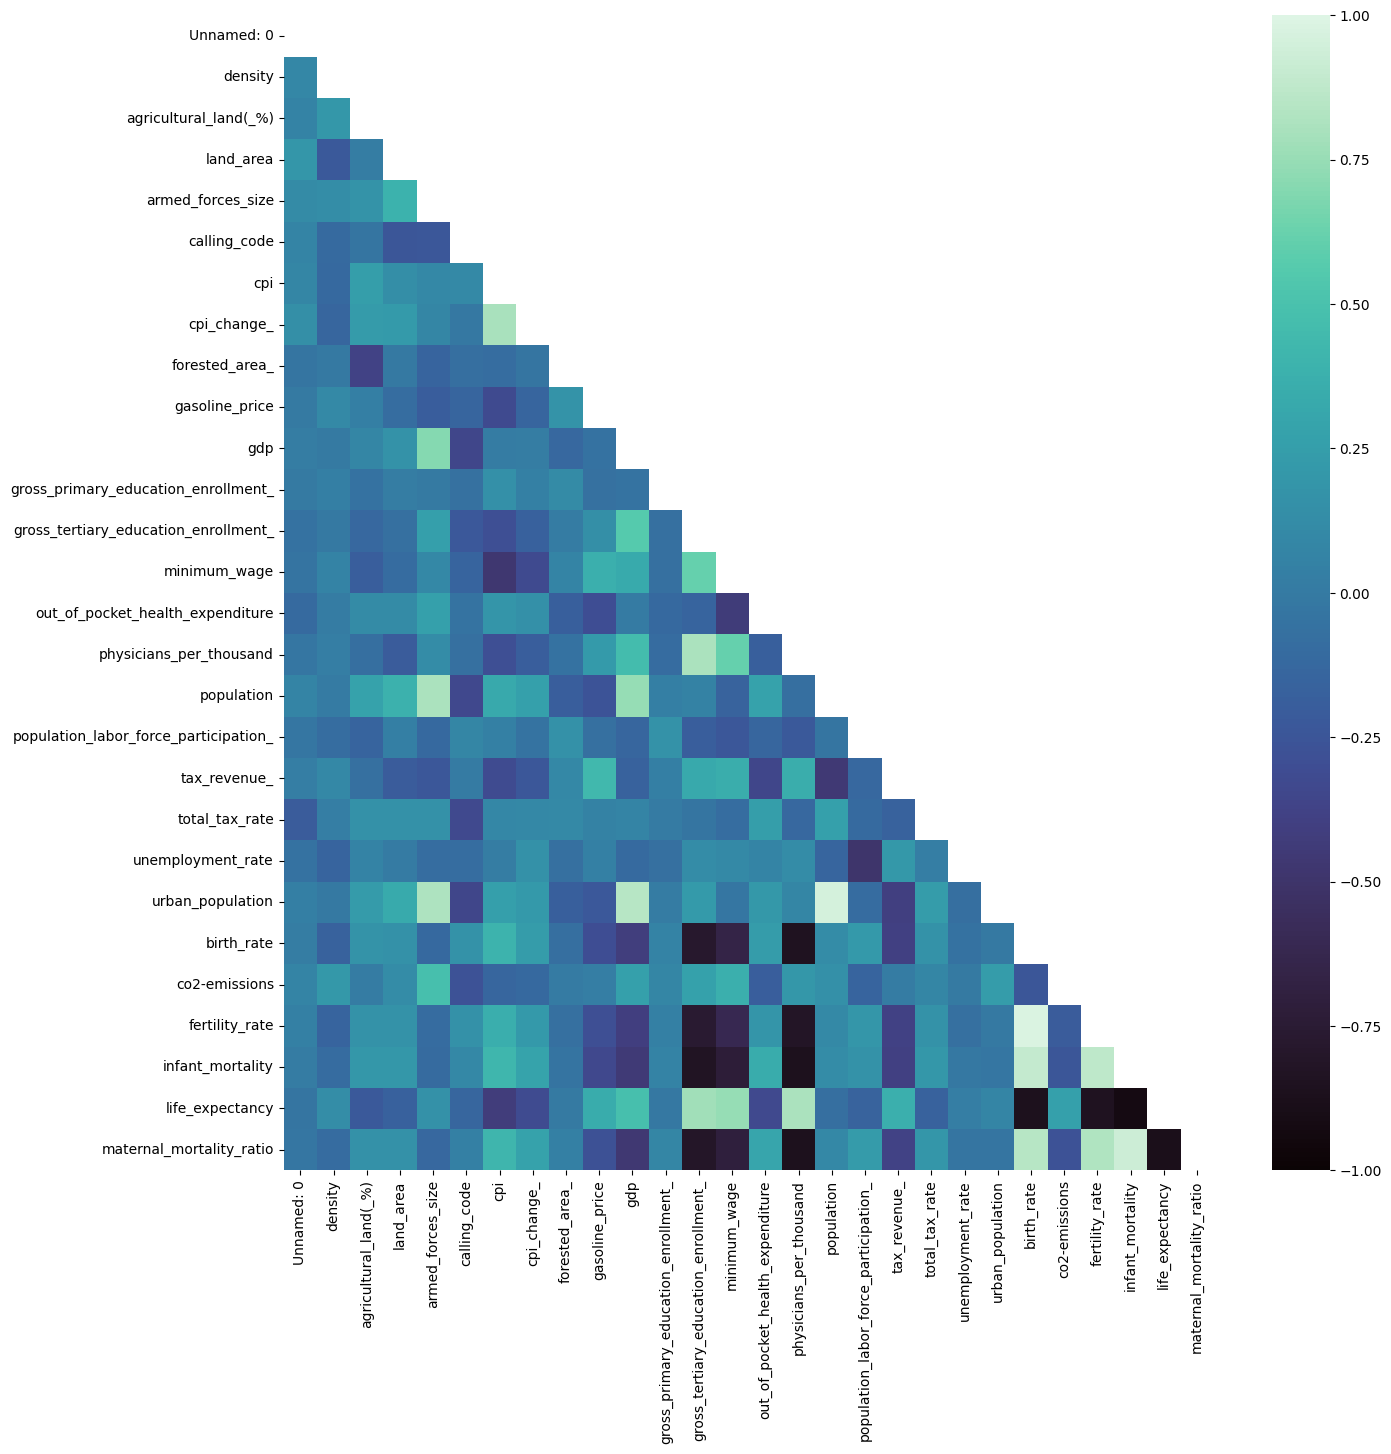

In [43]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

### correlación entre las variables de "fertility_rate" y "life_expectancy" es -0.85

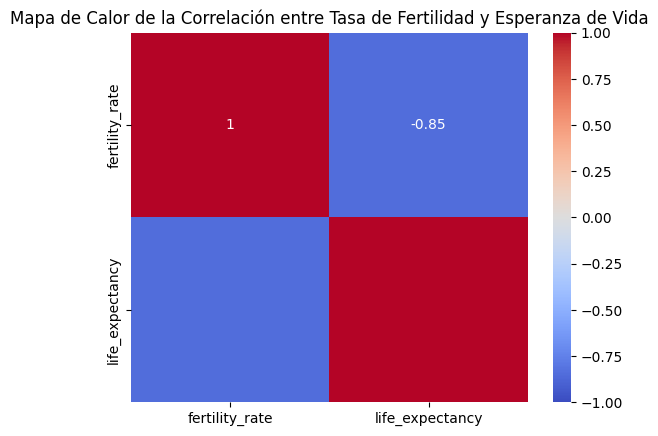

In [44]:
# Seleccionar solo las columnas que queremos correlacionar
df_correlacion = df_estadistica[['fertility_rate', 'life_expectancy']]

# Calcular la matriz de correlación
matriz_correlacion = df_correlacion.corr()

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del mapa de calor
plt.title('Mapa de Calor de la Correlación entre Tasa de Fertilidad y Esperanza de Vida')

# Mostrar el mapa de calor
plt.show()

Bonus:
1. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

2. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

3. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

4. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.